In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random

## Data loading ,preprocessing and feature extraction

In [2]:
geo_info = pd.read_csv("name_geographic_information.csv")
industry_info = pd.read_csv("base_etablissement_par_tranche_effectif.csv")
salary_info = pd.read_csv("net_salary_per_town_categories.csv")
population_info = pd.read_csv("population.csv")

C:\Users\ABHIGNA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
geo_info.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


In [4]:
industry_info.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [5]:
population_info.head()

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20


In [6]:
salary_info.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


#### Checking for Null and NAN values


In [7]:
geo_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
EU_circo                  36840 non-null object
code_région               36840 non-null int64
nom_région                36840 non-null object
chef.lieu_région          36840 non-null object
numéro_département        36840 non-null object
nom_département           36840 non-null object
préfecture                36840 non-null object
numéro_circonscription    36840 non-null int64
nom_commune               36840 non-null object
codes_postaux             36840 non-null object
code_insee                36840 non-null int64
latitude                  33911 non-null float64
longitude                 33999 non-null object
éloignement               33878 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.9+ MB


##### We can see that there are null values in columns Latitude,Longitude and Eloignement.
##### These features are not useful for our analysis and hence we can drop it. We can also drop columns 'EU_circo', 'code_région', 'éloignement', 'numéro_département', 'nom_département', 'préfecture', 'numéro_circonscription', 'codes_postaux' as it is not useful in the current context

In [8]:
geo_info.drop(['EU_circo', 'code_région', 'numéro_département', 'nom_département', 'préfecture', 'numéro_circonscription', 'codes_postaux','latitude','longitude','éloignement'],axis=1,inplace=True)

In [9]:
geo_info.rename(columns={"nom_région": "region"},inplace=True)
geo_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 4 columns):
region              36840 non-null object
chef.lieu_région    36840 non-null object
nom_commune         36840 non-null object
code_insee          36840 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


##### Industry_Info

In [10]:
industry_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
CODGEO      36681 non-null object
LIBGEO      36681 non-null object
REG         36681 non-null int64
DEP         36681 non-null object
E14TST      36681 non-null int64
E14TS0ND    36681 non-null int64
E14TS1      36681 non-null int64
E14TS6      36681 non-null int64
E14TS10     36681 non-null int64
E14TS20     36681 non-null int64
E14TS50     36681 non-null int64
E14TS100    36681 non-null int64
E14TS200    36681 non-null int64
E14TS500    36681 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


##### dropping REG,DEP and E14TS0ND columns

In [11]:
industry_info.drop(['REG','DEP','E14TS0ND'],axis=1,inplace=True)

##### Creating new features based on rest of the column values
##### Micro < 10, Small < 50, Medium < 250, Large < 1000 and Enterprise > 1000.

In [12]:
industry_info['Micro'] = industry_info['E14TS1'] + industry_info['E14TS6']
industry_info['Small'] = industry_info['E14TS10'] + industry_info['E14TS20']
industry_info['Medium'] = industry_info['E14TS50'] + industry_info['E14TS100']
industry_info['Large_and_Enterprise'] = industry_info['E14TS200'] + industry_info['E14TS500']

industry_info['Sum'] = industry_info['E14TS1'] + industry_info['E14TS6'] + industry_info['E14TS10'] + industry_info['E14TS20'] + industry_info['E14TS50'] + industry_info['E14TS100'] + industry_info['E14TS200'] + industry_info['E14TS500']

##### Dropping old columns

In [13]:
industry_info.drop(['E14TS1','E14TS6','E14TS10','E14TS20','E14TS50','E14TS100','E14TS200','E14TS500'],axis=1,inplace=True)

In [14]:
industry_info.head()

,CODGEO,LIBGEO,E14TST,Micro,Small,Medium,Large_and_Enterprise,Sum
0,01001,L'Abergement-Clémenciat,25,3,0,0,0,3
1,01002,L'Abergement-de-Varey,10,1,0,0,0,1
2,01004,Ambérieu-en-Bugey,996,335,70,12,2,419
3,01005,Ambérieux-en-Dombes,99,23,3,0,0,26
4,01006,Ambléon,4,0,0,0,0,0


In [15]:
industry_info.rename(columns={"E14TST": "Total companies"},inplace=True)

##### Salary

In [16]:
industry_info = industry_info[industry_info["CODGEO"].apply(lambda x: str(x).isdigit())]
industry_info["CODGEO"] = industry_info["CODGEO"].astype(int)
#

In [17]:
merged_data = industry_info.merge(geo_info, how="left", left_on = "CODGEO", right_on="code_insee")

In [18]:
salary_info = salary_info[salary_info["CODGEO"].apply(lambda x: str(x).isdigit())]
salary_info["CODGEO"] = salary_info["CODGEO"].astype(int)

In [19]:
top_industry = merged_data.sort_values(by=["Sum"], ascending=False)

In [20]:
top_industry.drop_duplicates(subset=None, keep='first', inplace=True)

##### We can see that there are columns with similar data, We can drop those to make our dataframe more concise



In [21]:
top_industry.drop(['chef.lieu_région','nom_commune','code_insee'],axis=1, inplace=True)

In [22]:
top_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36321 entries, 30526 to 36466
Data columns (total 9 columns):
CODGEO                  36321 non-null int32
LIBGEO                  36321 non-null object
Total companies         36321 non-null int64
Micro                   36321 non-null int64
Small                   36321 non-null int64
Medium                  36321 non-null int64
Large_and_Enterprise    36321 non-null int64
Sum                     36321 non-null int64
region                  36300 non-null object
dtypes: int32(1), int64(6), object(2)
memory usage: 2.6+ MB


## Data Analysis
##### Finding 10 major economic cities in france

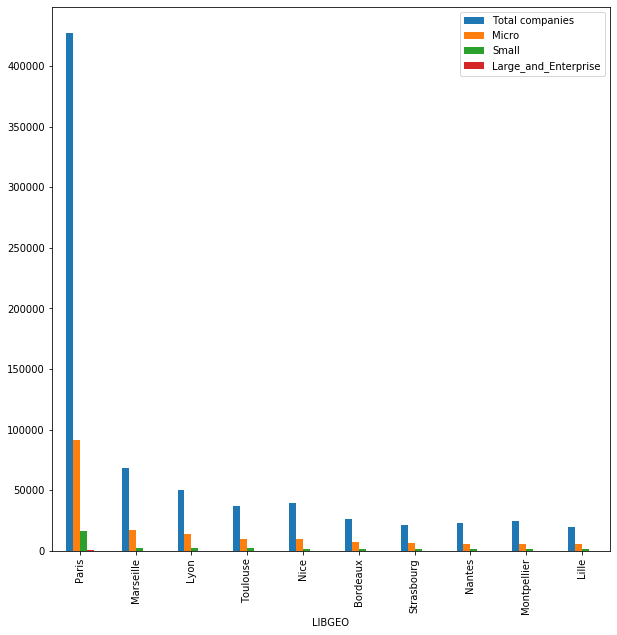

In [23]:
top_industry.head(10).plot(x='LIBGEO',y=['Total companies','Micro','Small','Large_and_Enterprise'],kind="bar",figsize=(10,10))


##### Showing ordered economic regions in France

In [24]:
regional_data = top_industry.groupby(['region']).sum()['Total companies'].sort_values(ascending=False).to_frame()

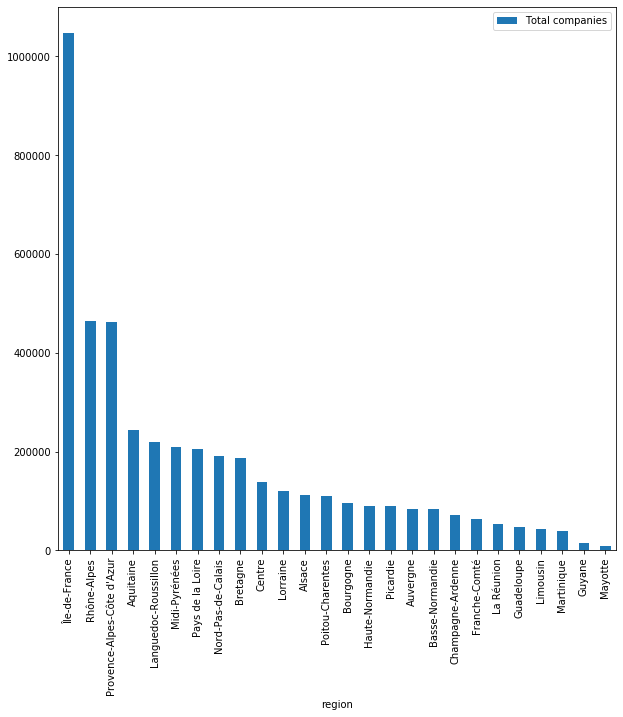

In [25]:
regional_data.plot(kind='bar',figsize=(10,10))

##### With the above data we can see that there is an uneven distribution of companies across france and Paris has most number of companies

##### Salary

In [26]:
salary_info.rename(columns={'SNHM14' : 'mean net salary',
'SNHMC14' : 'mean net salary/hour-executive',
'SNHMP14' : 'mean_net_salary/hr-middle manager',
'SNHME14' : 'mean_net_salary/hr-employee',
'SNHMO14' : 'mean net salary per hour-worker',
'SNHMF14' : 'mean_net_salary/lr-women',
'SNHMFC14' : 'mean_net_salary/hr-feminin executive',
'SNHMFP14' : 'mean_net_salary/hr-feminin middle manager',
'SNHMFE14' : 'mean_net_salary/hr-feminin employee',
'SNHMFO14' : 'mean_net_salary/hr-feminin worker',
'SNHMH14'  : 'mean_net_salary/hr-man',
'SNHMHC14' : 'mean_net_salary/hr-masculin executive',
'SNHMHP14' : 'mean_net_salary/hr-masculin middle manager',
'SNHMHE14' : 'mean_net_salary/hr-masculin employee',
'SNHMHO14' : 'mean_net_salary/hr-masculin worker',
'SNHM1814' : 'mean_net_salary/hr-18-25 years old',
'SNHM2614' : 'mean_net_salary/hr-26-50 years old',
'SNHM5014' : 'mean_net_salary/hr->50 years old',
'SNHMF1814' : 'mean_net_salary/hr-women between 18-25 years old',
'SNHMF2614' : 'mean_net_salary/hr-women between 26-50 years old',
'SNHMF5014' : 'mean_net_salary/hr-women >50 years old',
'SNHMH1814' : 'mean_net_salary/hr-men between 18-25 years old',
'SNHMH2614' : 'mean_net_salary/hr-men between 26-50 years old',
'SNHMH5014' : 'mean_net_salary/hr-men >50 years old'},inplace=True)

##### Salary  analysis by age, sex, job-role,region

In [27]:
salary_data = salary_info.merge(merged_data, how="right", left_on = "CODGEO", right_on="CODGEO")



##### Due to Salary dataset not having as many entries as rest of the datasets, we have merged this separately

##### Showing payscale variations across france

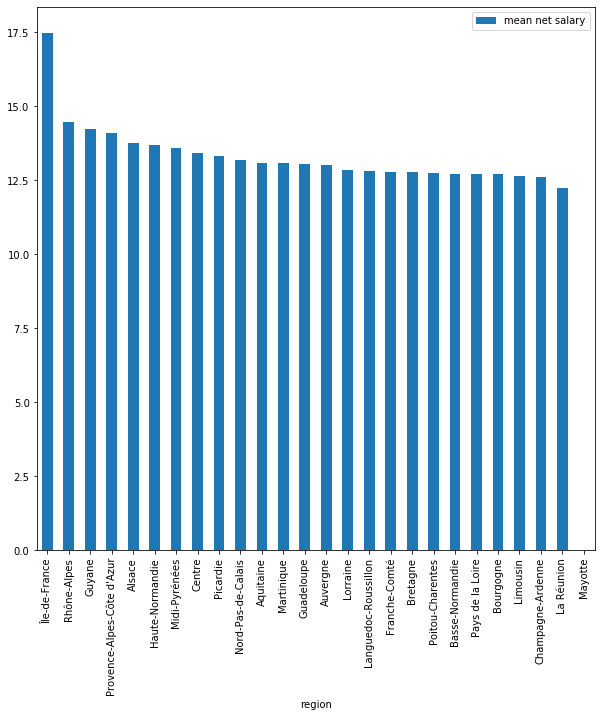

In [28]:
Regional_salary = salary_data.groupby('region').mean()['mean net salary'].sort_values(ascending=False).to_frame()
Regional_salary.plot(kind='bar',figsize=(10,10))

##### Apart from Ile-de -France region , rest of the regions have similar payscale

In [29]:
salary_data.drop(['Micro','Small','Medium','Large_and_Enterprise','Sum','code_insee','LIBGEO_y','nom_commune','chef.lieu_région'],axis=1,inplace=True)

### With Above data analysis we can conclude that the jobs are concentrated in urban areas which indicates an urbanisation trend.

##### Let us check if there is a correlation between gender pay gap and average salary in a region

In [30]:
gender_data = salary_data.groupby('region').mean()['mean_net_salary/lr-women'].sort_values(ascending=False).to_frame()
gender_data['mean_net_salary/hr-man'] = salary_data.groupby('region').mean()['mean_net_salary/hr-man']

#Regional_salary.plot(kind='bar',figsize=(10,10))

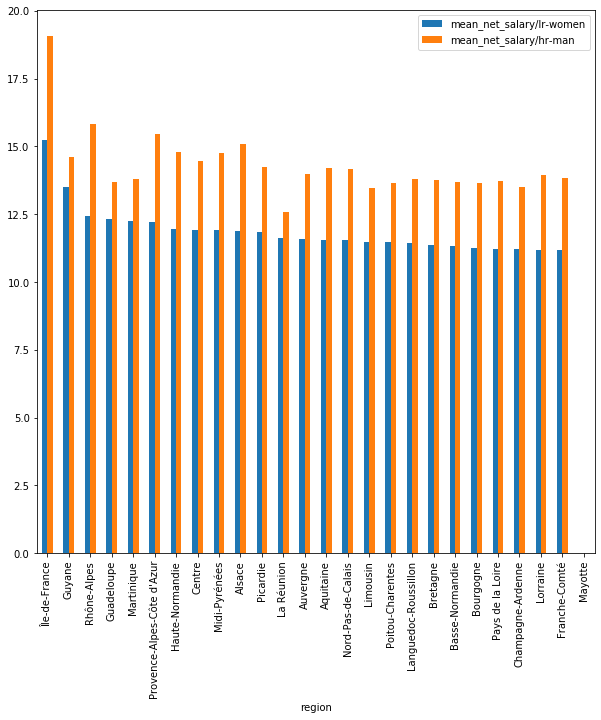

In [31]:
gender_data.plot(kind='bar',figsize=(10,10))

##### The graph clearly shows that there is a mismatch is payscale based on gender. Let us examine if there is a correlation between payscale difference and mean net salary of a region


In [32]:
gender_data['mean_net_salary'] = salary_data.groupby('region').mean()['mean net salary']
gender_data.dropna(inplace=True)

,CODGEO,mean net salary,mean net salary/hour-executive,mean_net_salary/hr-middle manager,mean_net_salary/hr-employee,mean net salary per hour-worker,mean_net_salary/lr-women,mean_net_salary/hr-feminin executive,mean_net_salary/hr-feminin middle manager,mean_net_salary/hr-feminin employee,...,mean_net_salary/hr-18-25 years old,mean_net_salary/hr-26-50 years old,mean_net_salary/hr->50 years old,mean_net_salary/hr-women between 18-25 years old,mean_net_salary/hr-women between 26-50 years old,mean_net_salary/hr-women >50 years old,mean_net_salary/hr-men between 18-25 years old,mean_net_salary/hr-men between 26-50 years old,mean_net_salary/hr-men >50 years old,Total companies
CODGEO,1.000000,0.211458,0.172958,0.176421,0.296250,0.216317,0.267029,0.212413,0.283046,0.326237,...,0.118030,0.214504,0.206193,0.271268,0.262597,0.272036,0.077038,0.185347,0.177418,0.028116
mean net salary,0.211458,1.000000,0.834910,0.710356,0.881267,0.807849,0.959352,0.698654,0.785904,0.848004,...,0.411271,0.990246,0.977615,0.620903,0.952674,0.913066,0.326363,0.983719,0.963778,0.210328
mean net salary/hour-executive,0.172958,0.834910,1.000000,0.575443,0.672987,0.627848,0.767790,0.761340,0.644533,0.644996,...,0.280208,0.802134,0.857059,0.467671,0.752915,0.744976,0.214612,0.807366,0.868172,0.182328
mean_net_salary/hr-middle manager,0.176421,0.710356,0.575443,1.000000,0.609910,0.601498,0.630514,0.472176,0.647754,0.591674,...,0.510388,0.715393,0.661294,0.431827,0.624443,0.601183,0.463352,0.733102,0.649022,0.108686
mean_net_salary/hr-employee,0.296250,0.881267,0.672987,0.609910,1.000000,0.732942,0.910196,0.618294,0.800216,0.959843,...,0.351232,0.887660,0.845152,0.632277,0.903132,0.869734,0.259974,0.861415,0.809925,0.134386
mean net salary per hour-worker,0.216317,0.807849,0.627848,0.601498,0.732942,1.000000,0.733772,0.503103,0.606762,0.691103,...,0.310446,0.799449,0.773830,0.495895,0.730600,0.684116,0.240232,0.802332,0.756448,0.095164
mean_net_salary/lr-women,0.267029,0.959352,0.767790,0.630514,0.910196,0.733772,1.000000,0.736158,0.848020,0.910124,...,0.382809,0.959158,0.937409,0.681825,0.991136,0.965103,0.285135,0.925711,0.904651,0.251505
mean_net_salary/hr-feminin executive,0.212413,0.698654,0.761340,0.472176,0.618294,0.503103,0.736158,1.000000,0.612158,0.615016,...,0.251786,0.685849,0.702206,0.464708,0.718801,0.736657,0.185266,0.657387,0.675858,0.180764
mean_net_salary/hr-feminin middle manager,0.283046,0.785904,0.644533,0.647754,0.800216,0.606762,0.848020,0.612158,1.000000,0.815576,...,0.309425,0.787353,0.766042,0.595915,0.833432,0.833183,0.220705,0.750919,0.725647,0.165071
mean_net_salary/hr-feminin employee,0.326237,0.848004,0.644996,0.591674,0.959843,0.691103,0.910124,0.615016,0.815576,1.000000,...,0.348196,0.856604,0.815946,0.657272,0.902523,0.877878,0.251629,0.819295,0.774283,0.153244


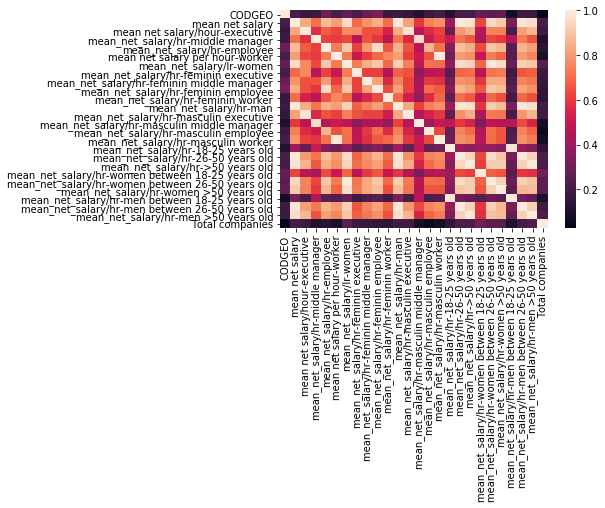

In [33]:
corr = salary_data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

,mean_net_salary/lr-women,mean_net_salary/hr-man,mean_net_salary
mean_net_salary/lr-women,1.000000,0.836610,0.923672
mean_net_salary/hr-man,0.836610,1.000000,0.981414
mean_net_salary,0.923672,0.981414,1.000000


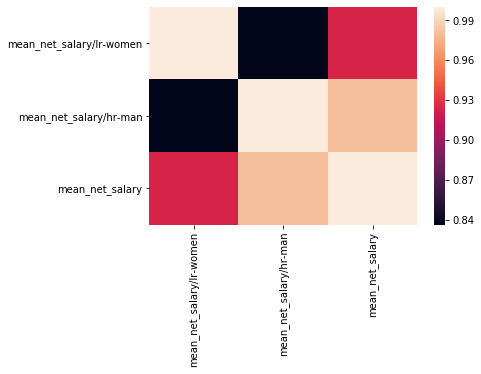

In [34]:
corr = gender_data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

##### We can see that there is a correlation between individual predictors and the output variable "mean_net_salary". However, the correlation between predictor variables is minimum. Plotting the variables to identify pattern

Text(0.5, 0, 'mean net salary')

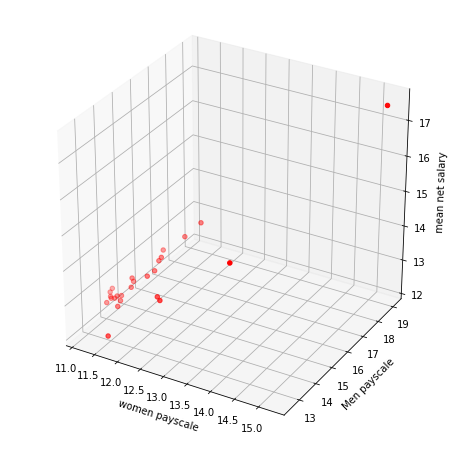

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"], gender_data["mean_net_salary"], c='r', marker='o')

ax.set_xlabel('women payscale')
ax.set_ylabel('Men payscale')
ax.set_zlabel('mean net salary')  


In [36]:
##### rotating the graph for better perspective

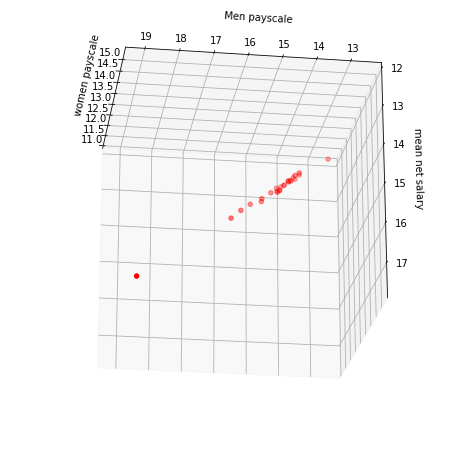

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"], gender_data["mean_net_salary"], c='r', marker='o')

ax.set_xlabel('women payscale')
ax.set_ylabel('Men payscale')
ax.set_zlabel('mean net salary')  
ax.view_init(158,-172)

##### We can see here that our distribution looks allmost linear. 
##### Splitting our dataset into training and test

In [38]:
nHead = int(len(gender_data)*0.85)
nTail = int(len(gender_data)*0.15)
X_train = gender_data.drop("mean_net_salary", axis=1).head(nHead)
X_test  = gender_data.drop("mean_net_salary", axis=1).tail(nTail)
Y_train = gender_data["mean_net_salary"].head(nHead)
Y_test = gender_data["mean_net_salary"].tail(nTail)

X_train.shape, X_test.shape

((21, 2), (3, 2))

##### fitting  data to a linear regression model

In [39]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(X_train, Y_train)
trainingacc_lr = round(regressor_lr.score(X_train, Y_train) * 100, 2)

# Predicting the Test set results
y_pred_lr = regressor_lr.predict(X_test)
acc_lr = round(regressor_lr.score(X_test, Y_test) * 100, 2)
print(trainingacc_lr,acc_lr)


99.82 90.64


##### Model predicts an accuracy of 90.64%. 

##### Is the model Overfitting? no, The prediction of test data also results in good level of accuracy. 
#####      Manual testing

In [40]:
test = gender_data.iloc[ 23 , : ]

In [41]:
test['mean_net_salary']

12.830837004405279

In [42]:
test.drop(['mean_net_salary'], axis=0, inplace = True)

In [43]:
prediction = regressor_lr.predict([test])
print(prediction)

[12.82557606]


##### Testing with mean Squared

In [44]:
print('intercept : ', regressor_lr.intercept_)
print('Coefficients: \n', regressor_lr.coef_)
# The mean squared error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error for training data: %.2f"
      % mean_squared_error(Y_train, regressor_lr.predict(X_train)))
print("Mean squared error for test data: %.2f"
      % mean_squared_error(Y_test, y_pred_lr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred_lr))


intercept :  0.048850092627617414
Coefficients: 
 [0.40621753 0.59019565]
Mean squared error for training data: 0.00
Mean squared error for test data: 0.00
Variance score: 0.91


##### Since the feature set is limited the model can be accurately trained resuting in mean square error of 0.
##### predictions with test data shows that the model is not overfitting

#### Plot the hyperplane

In [45]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

In [46]:
def plot_view(elev_given, azim_given):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    #Scatter plot
    ax.scatter(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"], gender_data["mean_net_salary"], c='C6', marker='o', alpha=0.6, label='Data points')

    #Plane 

    x0, x1 = np.meshgrid(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')

    ax.set_xlabel('Women payscale', fontsize = 15)
    ax.set_ylabel('Men payscale', fontsize = 15)
    ax.set_zlabel('mean payscale', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)
    
    

NameError: name 'Theta_0' is not defined

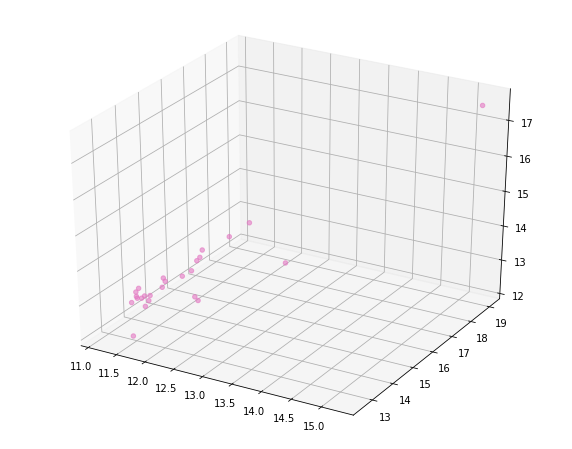

In [47]:
plot_view(158,-172)
plt.show()

In [ ]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.set_xlabel('Women payscale', fontsize = 15)
ax.set_ylabel('men payscale', fontsize = 15)
ax.set_zlabel('mean pay', fontsize = 15)

plt.close()

In [ ]:
def init():
    ax.scatter(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"], gender_data["mean_net_salary"], c='C6', marker='o', alpha=0.6) 
    x0, x1 = np.meshgrid(gender_data["mean_net_salary/lr-women"], gender_data["mean_net_salary/hr-man"])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5,color='C9', alpha=0.5)
    ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,


# Animate

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# plt.legend(fontsize=15, labels = [''])
anim.save('animation.gif', fps = 30)
plt.close()

In [ ]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [ ]:
age_data = salary_data.groupby('region')['mean net salary','mean_net_salary/hr-18-25 years old','mean_net_salary/hr-26-50 years old','mean_net_salary/hr->50 years old'].apply(lambda x: x.mean())
age_data.dropna(inplace=True)
corr1 = age_data.corr()
corr1 = (corr1)
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)

corr1



##### More interesting predictions can be made using population data

In [ ]:
population_info.isna().describe()

In [ ]:
print('The total population size is {:,}.'.format(population_info.NB.sum()))
population_info = population_info[population_info["CODGEO"].apply(lambda x: str(x).isdigit())]
population_info["CODGEO"] = population_info["CODGEO"].astype(int)

##### Due to  inconsistent data in population data set, the idea to test our hypothesis " more population = more companies" was not pursued ( file not loading fully in MS-excel, notebook) . 